In [1]:
import pandas as pd
import numpy as np


In [2]:
ref = pd.read_csv('data/reference_rooms.csv')
ref.head()

,hotel_id,lp_id,room_id,room_name
0,13484077,lp23e8ef,1142730702,Double or Twin Room
1,13487663,lp6554de34,1141927122,House
2,13462809,lp6556c3dc,1142722063,Room
3,13530116,lp6555450b,1141968275,Triple Room
4,13530071,lp6557a92c,1142513784,Apartment


In [3]:
upc = pd.read_csv('data/updated_core_rooms.csv')
upc.head()


,core_room_id,core_hotel_id,lp_id,supplier_room_id,supplier_name,supplier_room_name
0,1,506732,lp7bb6c,200979491,Expedia,Superior Double Room
1,2,509236,lp7c534,200998017,Expedia,"Deluxe Room, Balcony"
2,3,516326,lp7e0e6,201144757,Expedia,Female Dormitory- 3 Beds
3,4,495330,lp78ee2,201028863,Expedia,"Standard Apartment, 2 Bedrooms (6 people)"
4,5,970167,lpecdb7,218116045,Expedia,"Traditional Cottage, 2 Bedrooms, Harbor View"


=== EXPLORATORY DATA ANALYSIS FOR ROOM MATCHING API ===

=== DATASET OVERVIEW ===

Reference Data Shape: (100000, 4)

Reference Data Sample:
   hotel_id       lp_id     room_id            room_name
0  13484077    lp23e8ef  1142730702  Double or Twin Room
1  13487663  lp6554de34  1141927122                House
2  13462809  lp6556c3dc  1142722063                 Room
3  13530116  lp6555450b  1141968275          Triple Room
4  13530071  lp6557a92c  1142513784            Apartment

Reference Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   hotel_id   100000 non-null  int64 
 1   lp_id      100000 non-null  object
 2   room_id    100000 non-null  int64 
 3   room_name  100000 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.1+ MB
None

Reference Data Description:
            hotel_id       lp_id       room_id              ro

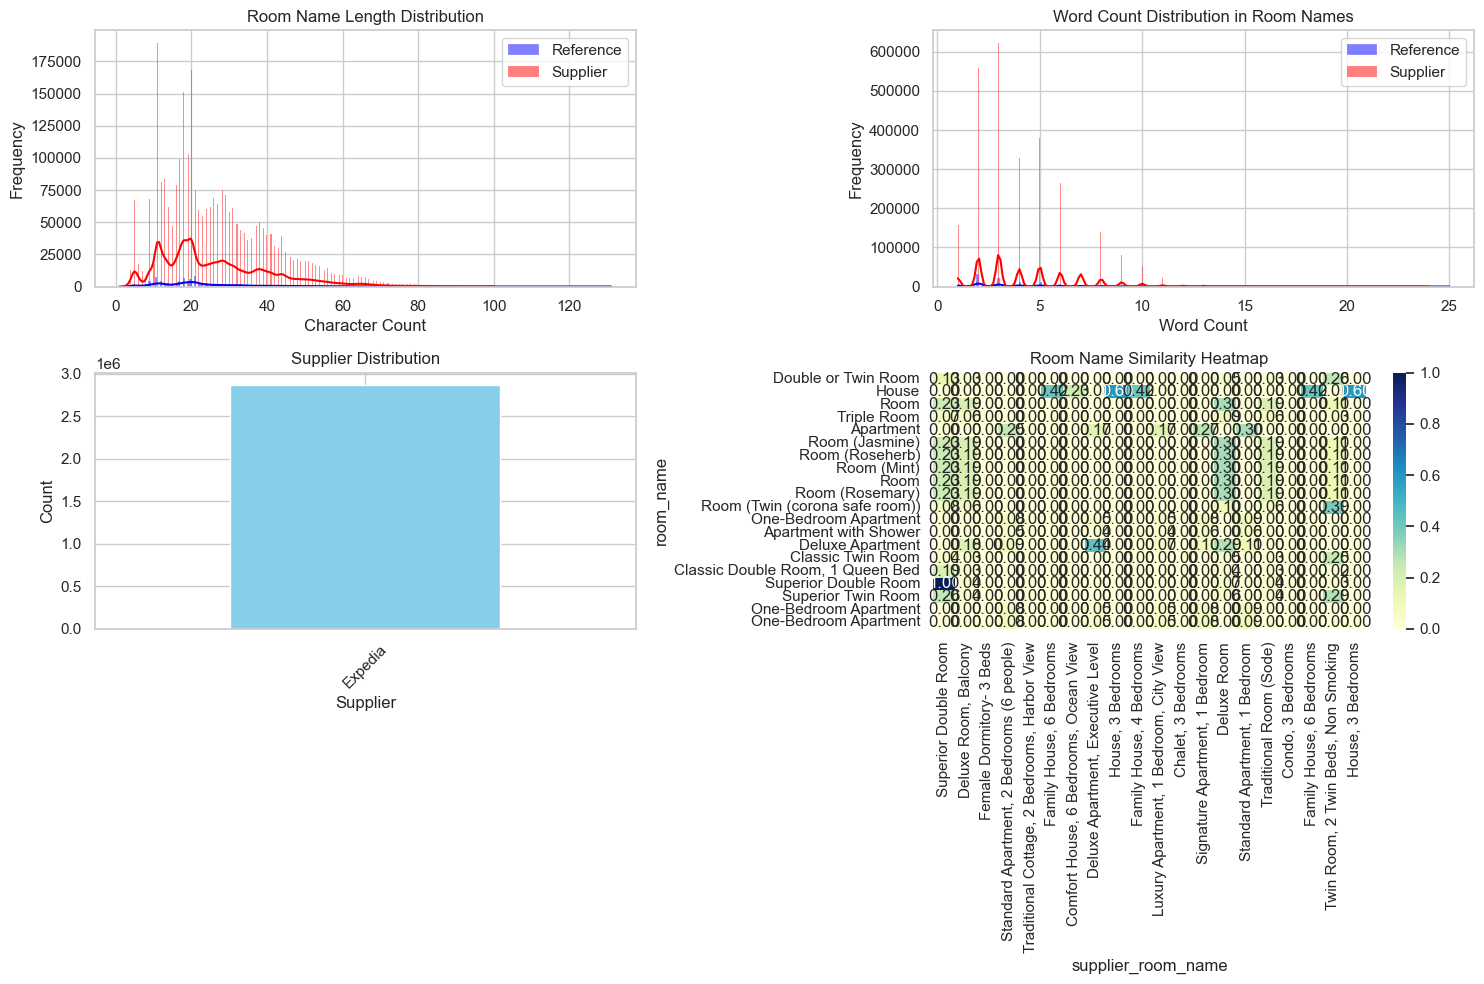

In [4]:
from analysis import analysis
analysis(ref, upc)

In [4]:
from data_processing import main
reference_rooms, supplier_rooms = main(ref, upc)


In [5]:
from find_perfect_matches import find_perfect_matches
label_data = find_perfect_matches(similarity_threshold=0.7)

/Users/xinzhang/.pyenv/versions/realtime_interview_copilot/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/xinzhang/.pyenv/versions/realtime_interview_copilot/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


250 500 250


In [6]:
label_data.to_csv('matches.csv', index=False)

In [7]:
from bert_xgb import BertXGBoostRoomMatcher

In [8]:
ref_s = reference_rooms.iloc[0:10000]
supplier_s = supplier_rooms.iloc[0:30000]
#matcher = BertXGBoostRoomMatcher(bert_model_name='prajjwal1/bert-tiny', batch_size=32) 
matcher = BertXGBoostRoomMatcher(bert_model_name='sentence-transformers/all-MiniLM-L6-v2', batch_size=32) 

加载BERT模型: sentence-transformers/all-MiniLM-L6-v2
使用设备: cpu


训练BERT+XGBoost房间匹配模型...
获取BERT嵌入...


BERT编码: 100%|██████████| 938/938 [00:19<00:00, 48.65it/s]


提取结构化特征...
生成合成训练数据...

分析特征相关性...


/Users/xinzhang/Codes/nuitee/bert_xgb.py:357: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/xinzhang/Codes/nuitee/bert_xgb.py:357: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/xinzhang/Codes/nuitee/bert_xgb.py:357: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/xinzhang/Codes/nuitee/bert_xgb.py:357: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/xinzhang/Codes/nuitee/bert_xgb.py:357: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/xinzhang/Codes/nuitee/bert_xgb.py:357: UserWarning: Glyph 30697 (\N{CJK UNIFIED IDEOGRAPH-77E9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/xinzhang/Codes/nuitee/bert_xgb.py:357: 

特征相关性热图已保存为 'feature_correlation.png'

特征与目标变量的互信息分数:
                       特征     互信息分数
1             jaccard_sim  0.215758
0                text_sim  0.215701
6      normalized_lev_sim  0.214298
3        ref_contains_sup  0.210473
4        sup_contains_ref  0.194797
2           token_overlap  0.144491
7         room_type_match  0.058715
8          bed_type_match  0.046283
9              view_match  0.036845
5            number_match  0.011804
12     capacity_bed_match  0.011507
11  capacity_people_match  0.001481
10          view_conflict  0.000543
特征重要性图已保存为 'feature_importance_mi.png'

高度相关的特征对 (|相关系数| > 0.75):
text_sim 和 jaccard_sim: 0.837
text_sim 和 ref_contains_sup: 0.824
text_sim 和 sup_contains_ref: 0.806
text_sim 和 normalized_lev_sim: 0.792
jaccard_sim 和 token_overlap: 0.829
jaccard_sim 和 ref_contains_sup: 0.952
jaccard_sim 和 sup_contains_ref: 0.933
jaccard_sim 和 normalized_lev_sim: 0.927
ref_contains_sup 和 sup_contains_ref: 0.957
ref_contains_sup 和 normalized_lev_sim: 0.918


/Users/xinzhang/Codes/nuitee/bert_xgb.py:373: UserWarning: Glyph 20114 (\N{CJK UNIFIED IDEOGRAPH-4E92}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/xinzhang/Codes/nuitee/bert_xgb.py:373: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/xinzhang/Codes/nuitee/bert_xgb.py:373: UserWarning: Glyph 24687 (\N{CJK UNIFIED IDEOGRAPH-606F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/xinzhang/Codes/nuitee/bert_xgb.py:373: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/xinzhang/Codes/nuitee/bert_xgb.py:373: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/xinzhang/Codes/nuitee/bert_xgb.py:373: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/xinzhang/Codes/nuitee/bert_xgb.py:373: 

特征数量从 781 减少到 774

保留的特征:
- jaccard_sim
- number_match
- room_type_match
- bed_type_match
- view_match
- capacity_bed_match
- ref_emb_0
- ref_emb_1
- ref_emb_2
- ref_emb_3
- ref_emb_4
- ref_emb_5
- ref_emb_6

训练XGBoost模型，使用84740个样本...
[0]	train-logloss:0.21041	val-logloss:0.20726
[10]	train-logloss:0.06557	val-logloss:0.06506
[20]	train-logloss:0.02395	val-logloss:0.02386
[30]	train-logloss:0.00891	val-logloss:0.00891
[40]	train-logloss:0.00338	val-logloss:0.00339
[50]	train-logloss:0.00129	val-logloss:0.00131
[60]	train-logloss:0.00053	val-logloss:0.00056
[70]	train-logloss:0.00024	val-logloss:0.00027
[80]	train-logloss:0.00013	val-logloss:0.00016
[90]	train-logloss:0.00008	val-logloss:0.00011
[99]	train-logloss:0.00006	val-logloss:0.00009
验证集性能: 精确率=1.0000, 召回率=1.0000, F1分数=1.0000
模型已保存到: ./bert_xgb_room_matcher.joblib

Top 10 特征重要性:
  jaccard_sim: 711.27294921875
  room_type_match: 680.4743041992188
  bed_type_match: 186.9474334716797
  ref_emb_372: 169.4294891357422
  ref_emb_344: 

/Users/xinzhang/Codes/nuitee/bert_xgb.py:509: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/xinzhang/Codes/nuitee/bert_xgb.py:509: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/xinzhang/Codes/nuitee/bert_xgb.py:509: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/xinzhang/Codes/nuitee/bert_xgb.py:509: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/xinzhang/Codes/nuitee/bert_xgb.py:509: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/xinzhang/Codes/nuitee/bert_xgb.py:510: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  plt.savefig('xgboost_feature_importance.png')
/Users/xinzhang/Cod

/Users/xinzhang/.pyenv/versions/realtime_interview_copilot/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xinzhang/.pyenv/versions/realtime_interview_copilot/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xinzhang/.pyenv/versions/realtime_interview_copilot/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xinzhang/.pyenv/versions/realtime_interview_copilot/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(byte

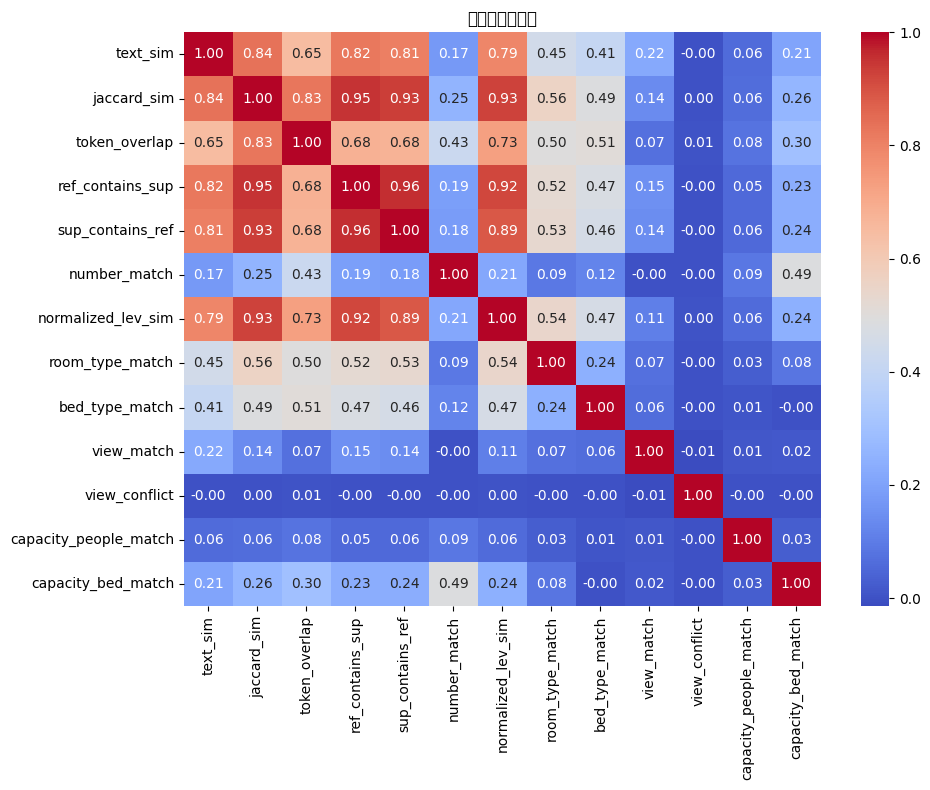

/Users/xinzhang/.pyenv/versions/realtime_interview_copilot/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xinzhang/.pyenv/versions/realtime_interview_copilot/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30446 (\N{CJK UNIFIED IDEOGRAPH-76EE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xinzhang/.pyenv/versions/realtime_interview_copilot/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xinzhang/.pyenv/versions/realtime_interview_copilot/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(byte

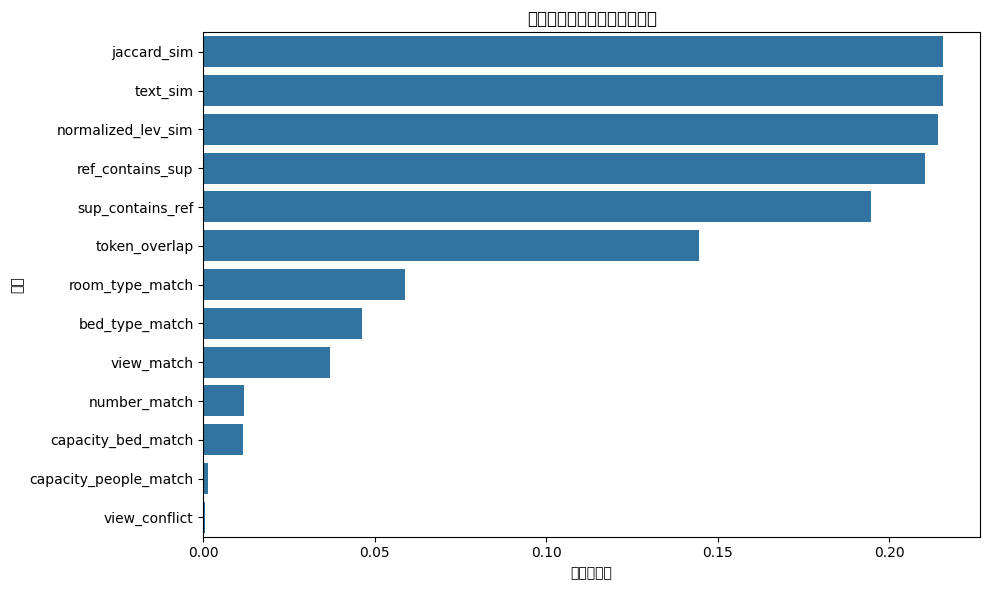

/Users/xinzhang/.pyenv/versions/realtime_interview_copilot/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/xinzhang/.pyenv/versions/realtime_interview_copilot/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


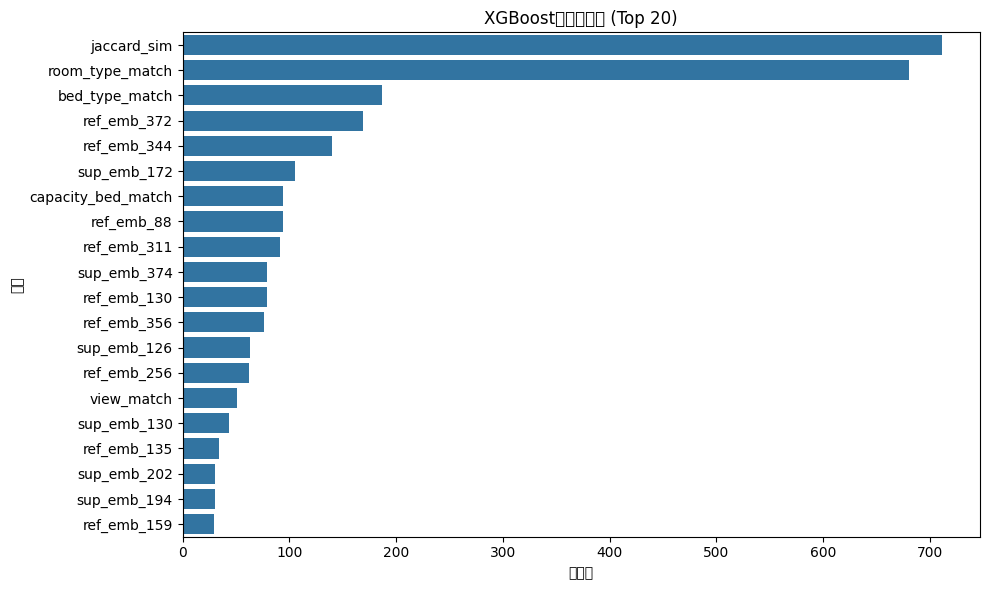

In [9]:
matcher.train(ref_s, supplier_s)

In [7]:


ref_s = reference_rooms.iloc[0:10000]
supplier_s = supplier_rooms.iloc[0:20000]
matcher = BertXGBoostRoomMatcher(bert_model_name='prajjwal1/bert-tiny', batch_size=32) 
matcher.train(ref_s, supplier_s)
    


加载BERT模型: prajjwal1/bert-tiny
使用设备: cpu
训练BERT+XGBoost房间匹配模型...
获取BERT嵌入...
从缓存加载BERT嵌入...
从缓存加载BERT嵌入...
提取结构化特征...
生成合成训练数据...
        0    1    2    3    4    5    6         7         8         9    ...  \
0  0.785461  0.0  0.0  1.0  0.0  0.0  0.0 -1.087509  0.253939 -3.828410  ...   
1  1.000000  1.0  0.0  1.0  0.0  0.0  0.0 -0.273703  0.292329 -3.283674  ...   
2  1.000000  1.0  0.0  1.0  0.0  0.0  0.0 -1.783789  0.162121 -3.244087  ...   
3  0.778132  0.0  0.0  0.0  0.0  0.0  0.0 -1.334804  0.601053 -3.612597  ...   
4  0.713195  0.0  0.0  1.0  0.0  0.0  0.0 -0.891191 -0.159204 -3.558709  ...   

        253       254       255       256       257       258       259  \
0  0.675524  0.509778  0.013595  0.246139 -0.366082 -0.853024 -1.187364   
1  1.126597 -0.455213 -0.745456 -0.004688  0.435047  0.020124 -1.462379   
2  0.452105 -0.022213  0.838464  0.241109  0.327983  0.082965 -0.476717   
3  0.968304  0.533344 -0.202185  0.053810 -0.080207 -0.648834 -0.713684   
4  0.295106  0.

In [6]:
matcher = BertXGBoostRoomMatcher(bert_model_name='prajjwal1/bert-tiny', batch_size=32) 
matcher.load_model()    

加载BERT模型: prajjwal1/bert-tiny
使用设备: cpu


True

In [10]:
    # 预测匹配
ref_s = reference_rooms.iloc[0:1000]
supplier_sp = supplier_rooms.iloc[20000:21000]
matches = matcher.predict(ref_s, supplier_sp, threshold=0.9)
print(matches)

预测房间匹配...
获取BERT嵌入...


BERT编码: 100%|██████████| 32/32 [00:00<00:00, 46.31it/s]


提取结构化特征...
预测匹配...


预测匹配: 100%|██████████| 1000/1000 [00:16<00:00, 62.20it/s]

匹配完成! 耗时: 17.39秒
找到613个匹配
     reference_hotel_id  reference_room_id  \
0              13484077         1142730702   
1              13462809         1142722063   
2              13530116         1141968275   
3              13530071         1142513784   
4              13530384         1141970198   
..                  ...                ...   
608            13572897         1142832820   
609            13572897         1142832823   
610            13575457         1142836637   
611            13575457         1142836648   
612            13575457         1142836654   

                        reference_room_name  supplier_room_id  \
0                       Double or Twin Room         201371774   
1                                      Room         230705562   
2                               Triple Room         201688876   
3                                 Apartment         201891119   
4                                      Room         230705562   
..                             

In [15]:
label_data = pd.read_csv('matches.csv')
label_data['label'] = label_data['text_similarity'].apply(lambda x: 1 if x >0.9 else 0)

In [16]:
label_data.head()

,reference_hotel_id,reference_room_id,reference_room_name,reference_processed_name,supplier_room_id,supplier_room_name,supplier_processed_name,text_similarity,label
0,13431761,1142150973,"Superior Room, Mountain View",superior room mountain view,201006793,"Superior Room, Mountain View",superior room mountain view,1.0,1
1,13619916,1142062343,Grand Deluxe Room,grand deluxe room,230760088,Grand Deluxe Room,grand deluxe room,1.0,1
2,13645586,1142629660,"Room, 2 Queen Beds, Accessible, Bathtub",room 2 queen bed accessible bathtub,201030617,"Room, 2 Queen Beds, Accessible, Bathtub",room 2 queen bed accessible bathtub,1.0,1
3,13522822,1141957257,Honeymoon Suite,honeymoon suite,201155941,Honeymoon Suite,honeymoon suite,1.0,1
4,13485910,1142197380,Comfort Room,comfort room,218444778,Comfort Room,comfort room,1.0,1


In [17]:
def evaluate_model(matcher, labeled_data, threshold=0.5):
    """使用标记数据评估模型性能"""
    print("开始模型评估...")
    
    # 准备评估数据
    eval_data = []
    
    # 对每个标记样本进行预测
    for i, row in labeled_data.iterrows():
        ref_id = row['reference_room_id']
        sup_id = row['supplier_room_id']
        true_label = row['label']
        
        # 直接从标记数据获取房间名称
        ref_name = row['reference_processed_name']
        sup_name = row['supplier_processed_name']
        
        # 使用模型预测匹配概率
        # 获取BERT嵌入
        ref_embedding = matcher.get_bert_embeddings([ref_name])[0]
        sup_embedding = matcher.get_bert_embeddings([sup_name])[0]
        
        # 提取结构化特征
        ref_feature = matcher.extract_features(ref_name)
        sup_feature = matcher.extract_features(sup_name)
        
        # 创建特征对
        features = matcher.create_pair_features(
            ref_embedding, sup_embedding,
            ref_feature, sup_feature,
            ref_name, sup_name
        )
        
        # 应用特征掩码（如果有）
        if hasattr(matcher, 'feature_mask') and matcher.feature_mask is not None:
            features = features[matcher.feature_mask]
        
        # 预测
        import xgboost as xgb
        import numpy as np
        dmatrix = xgb.DMatrix(np.array([features]))
        prob = float(matcher.xgb_model.predict(dmatrix)[0])
        
        # 确定预测标签
        pred_label = 1 if prob >= threshold else 0
        
        # 添加到评估数据
        eval_data.append({
            'reference_id': ref_id,
            'reference_name': row['reference_room_name'],
            'supplier_id': sup_id,
            'supplier_name': row['supplier_room_name'],
            'true_label': true_label,
            'pred_prob': prob,
            'pred_label': pred_label,
            'correct': true_label == pred_label
        })
    
    # 转换为DataFrame
    eval_df = pd.DataFrame(eval_data)
    
    # 计算评估指标
    total = len(eval_df)
    correct = eval_df['correct'].sum()
    accuracy = correct / total
    
    # 计算精确率、召回率和F1分数
    from sklearn.metrics import precision_recall_fscore_support
    precision, recall, f1, _ = precision_recall_fscore_support(
        eval_df['true_label'], 
        eval_df['pred_label'], 
        average='binary'
    )
    
    # 打印评估结果
    print("\n模型评估结果:")
    print(f"总样本数: {total}")
    print(f"正确预测: {correct} ({accuracy*100:.2f}%)")
    print(f"精确率: {precision:.4f}")
    print(f"召回率: {recall:.4f}")
    print(f"F1分数: {f1:.4f}")
    
    # 分析错误预测
    errors = eval_df[eval_df['correct'] == False]
    false_positives = errors[errors['pred_label'] == 1]
    false_negatives = errors[errors['pred_label'] == 0]
    
    print(f"\n假阳性 (预测匹配但实际不匹配): {len(false_positives)}")
    print(f"假阴性 (预测不匹配但实际匹配): {len(false_negatives)}")
    
    # 显示一些错误示例
    if len(false_positives) > 0:
        print("\n假阳性示例:")
        for i, row in false_positives.head(3).iterrows():
            print(f"参考房间: {row['reference_name']}")
            print(f"供应商房间: {row['supplier_name']}")
            print(f"预测概率: {row['pred_prob']:.4f}")
            print("---")
    
    if len(false_negatives) > 0:
        print("\n假阴性示例:")
        for i, row in false_negatives.head(3).iterrows():
            print(f"参考房间: {row['reference_name']}")
            print(f"供应商房间: {row['supplier_name']}")
            print(f"预测概率: {row['pred_prob']:.4f}")
            print("---")
    
    # 绘制ROC曲线和PR曲线
    try:
        import matplotlib.pyplot as plt
        from sklearn.metrics import roc_curve, precision_recall_curve, auc
        
        # ROC曲线
        fpr, tpr, _ = roc_curve(eval_df['true_label'], eval_df['pred_prob'])
        roc_auc = auc(fpr, tpr)
        
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC曲线 (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('假阳性率')
        plt.ylabel('真阳性率')
        plt.title('ROC曲线')
        plt.legend(loc="lower right")
        
        # PR曲线
        precision_curve, recall_curve, _ = precision_recall_curve(eval_df['true_label'], eval_df['pred_prob'])
        pr_auc = auc(recall_curve, precision_curve)
        
        plt.subplot(1, 2, 2)
        plt.plot(recall_curve, precision_curve, color='blue', lw=2, label=f'PR曲线 (AUC = {pr_auc:.2f})')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('召回率')
        plt.ylabel('精确率')
        plt.title('精确率-召回率曲线')
        plt.legend(loc="lower left")
        
        plt.tight_layout()
        plt.savefig('model_evaluation.png')
        print("\n评估曲线已保存为 'model_evaluation.png'")
    except Exception as e:
        print(f"无法绘制评估曲线: {e}")
    
    # 返回评估指标
    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc if 'roc_auc' in locals() else None,
        'pr_auc': pr_auc if 'pr_auc' in locals() else None
    }
    
    return metrics, eval_df

开始模型评估...


BERT编码: 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 85.98it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 110.79it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 96.23it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 118.88it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 55.13it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 91.30it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 115.81it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 94.84it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 59.84it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 89.76it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 100.04it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 100.18it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 80.46it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 101.47it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 89.37it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 76.79it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 95.04it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 94.67it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 113.21it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 94.87it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 108.92it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 85.93it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 118.25it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 95.66it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 62.32it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 102.74it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00,  7.54it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 29.83it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 50.63it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 89.65it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 87.74it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 101.29it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 90.71it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 120.15it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 100.38it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 68.31it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 78.61it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 54.98it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 92.17it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 89.28it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 96.33it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 93.00it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 87.38it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 93.34it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 117.36it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 62.68it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 118.87it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 94.75it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 98.42it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 50.99it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 91.14it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 92.43it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 83.66it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 82.02it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 97.09it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 55.75it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 110.58it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 109.77it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 80.70it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 116.28it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 94.35it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 92.92it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 97.86it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 104.31it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 91.86it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 87.97it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 104.10it/s]


从缓存加载BERT嵌入...
从缓存加载BERT嵌入...
从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 77.33it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 101.66it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 115.86it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 102.93it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 123.61it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 95.99it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 85.29it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 107.43it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 103.68it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 111.91it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 102.78it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 85.42it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 90.10it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 64.31it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 84.90it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 104.50it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 101.77it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 94.81it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00,  7.88it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 31.82it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 115.18it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 111.22it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 49.48it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 103.11it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 89.05it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 97.76it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 107.68it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 93.71it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 115.08it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 86.31it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 96.01it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 108.37it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 102.63it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 117.11it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 92.22it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 87.26it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 100.21it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 124.28it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 98.39it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 77.33it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 90.34it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 112.62it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 99.22it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 106.61it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 101.90it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 91.60it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 115.13it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 126.01it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 96.73it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 83.31it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 94.03it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 92.09it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 97.98it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 75.52it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 98.47it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 109.29it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 105.47it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 89.86it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 91.14it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 78.95it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 93.39it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 85.40it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 65.67it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 93.24it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 120.53it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 90.51it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 113.33it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 109.94it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 114.72it/s]


从缓存加载BERT嵌入...
从缓存加载BERT嵌入...
从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 91.76it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 138.77it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 89.06it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 98.48it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 86.84it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 87.84it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 101.38it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 112.32it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 89.98it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 58.62it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 114.34it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 50.37it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 20.42it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 85.19it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 92.57it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 44.56it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 129.74it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 103.07it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 58.59it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 107.10it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 89.12it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 115.77it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 110.51it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 82.39it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 99.45it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 90.84it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 109.34it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 90.38it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 102.41it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 99.68it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 64.97it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 118.59it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 96.70it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 95.79it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 106.07it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 87.27it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 45.52it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 96.88it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 116.12it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 80.66it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 61.79it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 104.77it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 98.73it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 80.55it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 70.60it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 89.53it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 79.23it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 75.89it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 73.39it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 74.06it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 103.29it/s]


从缓存加载BERT嵌入...
从缓存加载BERT嵌入...
从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 69.44it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 88.23it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 128.90it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 91.79it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 82.48it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 80.72it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 94.99it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 51.19it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 108.19it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 102.37it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 105.00it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 89.73it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 79.58it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 75.06it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 103.41it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 78.56it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 119.98it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 102.25it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 97.36it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 95.00it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 100.98it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 101.90it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 98.24it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 88.01it/s]

从缓存加载BERT嵌入...



BERT编码: 100%|██████████| 1/1 [00:00<00:00, 100.78it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 72.52it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 84.12it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 57.29it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 103.58it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00,  7.41it/s]


从缓存加载BERT嵌入...
从缓存加载BERT嵌入...
从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 30.85it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 135.70it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 105.38it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 94.15it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 78.74it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 69.18it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 87.20it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 70.66it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 100.73it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 108.51it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 110.40it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 94.46it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 83.82it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 98.74it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 51.17it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 105.67it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 89.50it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 86.92it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 84.41it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 101.71it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 80.94it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 93.04it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 87.46it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 84.80it/s]


从缓存加载BERT嵌入...
从缓存加载BERT嵌入...
从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 88.24it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 77.98it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 113.62it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 96.90it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 103.39it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 85.78it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 104.73it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 111.51it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 105.60it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 142.81it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 132.54it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 80.53it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 94.17it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 51.68it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 108.20it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 102.00it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 162.89it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 127.21it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 82.28it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 117.37it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 114.51it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 138.16it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 97.45it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 99.90it/s]


从缓存加载BERT嵌入...
从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 116.73it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 135.98it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 91.27it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 108.91it/s]


从缓存加载BERT嵌入...
从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 79.13it/s]


从缓存加载BERT嵌入...
从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 93.96it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 128.44it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 114.56it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 94.80it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 86.27it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 156.61it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 112.27it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 137.87it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 118.96it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 90.54it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 100.34it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 115.30it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 98.05it/s]


从缓存加载BERT嵌入...
从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 112.69it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 107.83it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 113.57it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 92.37it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 113.80it/s]


从缓存加载BERT嵌入...
从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 116.65it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 98.72it/s]


从缓存加载BERT嵌入...
从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 113.26it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 103.46it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 133.89it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 119.45it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 90.29it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 105.05it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 106.16it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 98.49it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 92.88it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 91.42it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 110.78it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 113.48it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 99.80it/s]


从缓存加载BERT嵌入...
从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 140.28it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 123.03it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 126.78it/s]


从缓存加载BERT嵌入...
从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 157.46it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 100.14it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 105.37it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 120.38it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 126.90it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 90.34it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 155.79it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 117.43it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 138.72it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 108.85it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 117.52it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 124.44it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 131.46it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 95.89it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 99.04it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 111.99it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 121.46it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 71.68it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 78.72it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 114.05it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00,  7.66it/s]


从缓存加载BERT嵌入...
从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 121.87it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 94.18it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 107.62it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 138.03it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 87.38it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 89.34it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 87.81it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 124.05it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 84.48it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 106.57it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 81.20it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 155.03it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 114.27it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 109.06it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 95.74it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 120.30it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 133.48it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 97.13it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 157.04it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 112.84it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 121.91it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 118.37it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 155.30it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 98.53it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 135.41it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 101.79it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 108.22it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 112.87it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 110.87it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 93.26it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 137.89it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 93.72it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 132.43it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 91.20it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 137.60it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 136.78it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 121.09it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 73.29it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 91.66it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 136.95it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 92.74it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 83.09it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 131.68it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 158.14it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 80.56it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 113.21it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 112.97it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 107.46it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 113.29it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 83.43it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 138.53it/s]


从缓存加载BERT嵌入...


BERT编码: 100%|██████████| 1/1 [00:00<00:00, 121.85it/s]



模型评估结果:
总样本数: 1000
正确预测: 861 (86.10%)
精确率: 0.8591
召回率: 0.9636
F1分数: 0.9084

假阳性 (预测匹配但实际不匹配): 113
假阴性 (预测不匹配但实际匹配): 26

假阳性示例:
参考房间: Shared Dormitory (For 9 people)
供应商房间: Shared Dormitory (8 people)
预测概率: 0.8146
---
参考房间: Villa, 1 Bedroom, Ocean View
供应商房间: Villa, 4 Bedrooms, Ocean View
预测概率: 0.9987
---
参考房间: Bed in 12-Bed Female Dormitory Room
供应商房间: Bed in 6-Bed Female Dormitory Room
预测概率: 0.9991
---

假阴性示例:
参考房间: Luxury Suite, 2 Bedrooms, Ocean View
供应商房间: Two Bedroom Suite with Ocean View
预测概率: 0.4408
---
参考房间: Two Bedrooms Villa
供应商房间: 2 Bedroom Villa
预测概率: 0.1109
---
参考房间: Small Single Room
供应商房间: A Tiny Single Room
预测概率: 0.4055
---

评估曲线已保存为 'model_evaluation.png'


/var/folders/_r/fkx738_16cn3dn68b0dfhhqr0000gn/T/ipykernel_18127/1420418683.py:141: UserWarning: Glyph 20551 (\N{CJK UNIFIED IDEOGRAPH-5047}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/_r/fkx738_16cn3dn68b0dfhhqr0000gn/T/ipykernel_18127/1420418683.py:141: UserWarning: Glyph 38451 (\N{CJK UNIFIED IDEOGRAPH-9633}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/_r/fkx738_16cn3dn68b0dfhhqr0000gn/T/ipykernel_18127/1420418683.py:141: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/_r/fkx738_16cn3dn68b0dfhhqr0000gn/T/ipykernel_18127/1420418683.py:141: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/_r/fkx738_16cn3dn68b0dfhhqr0000gn/T/ipykernel_18127/1420418683.py:141: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/_r

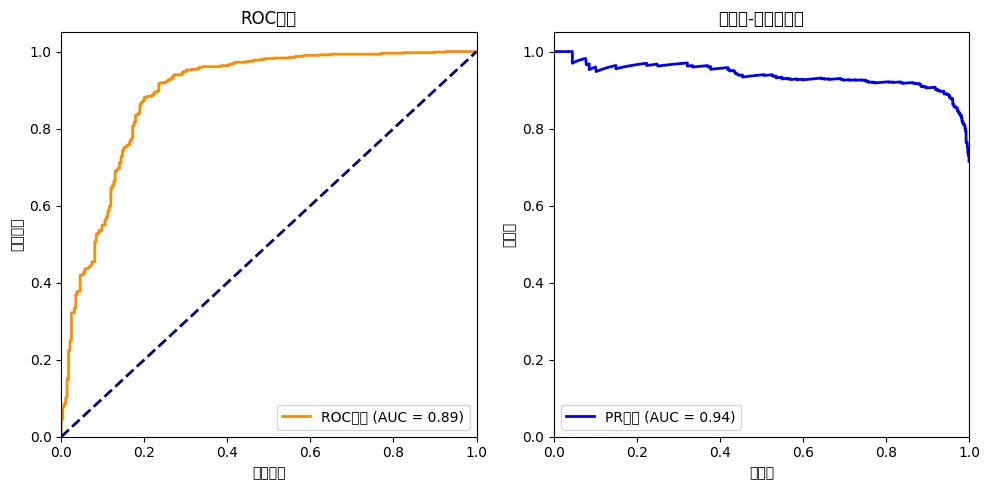

In [18]:
metrics, results = evaluate_model(matcher, label_data, threshold=0.5)

In [19]:
metrics

{'accuracy': np.float64(0.861),
 'precision': 0.8591022443890274,
 'recall': 0.9636363636363636,
 'f1': 0.9083717864205669,
 'roc_auc': np.float64(0.8903668261562998),
 'pr_auc': np.float64(0.9383653423184548)}

In [22]:
results[results['correct']==False]

,reference_id,reference_name,supplier_id,supplier_name,true_label,pred_prob,pred_label,correct
257,1142613867,"Luxury Suite, 2 Bedrooms, Ocean View",201001263,Two Bedroom Suite with Ocean View,1,0.440802,0,False
264,1143440056,Two Bedrooms Villa,201180609,2 Bedroom Villa,1,0.110944,0,False
271,1143627768,Shared Dormitory (For 9 people),201307788,Shared Dormitory (8 people),0,0.814616,1,False
277,1143643089,"Villa, 1 Bedroom, Ocean View",321024805,"Villa, 4 Bedrooms, Ocean View",0,0.998747,1,False
325,658125402,Small Single Room,201237817,A Tiny Single Room,1,0.405520,0,False
...,...,...,...,...,...,...,...,...
987,1142843529,"Family Quadruple Room, 2 Bedrooms, Refrigerato...",218110252,"Family Quadruple Room, 2 Double Beds, Accessib...",1,0.008120,0,False
990,1143569342,Standard Room (White),201917987,Standard Room,0,0.999771,1,False
991,1142737407,Suite (Coach House),201289561,Suite House,0,0.999662,1,False
993,1143625881,5 Bed Ensuite Room,220259389,5 bed room,0,0.999462,1,False


In [ ]:
from data_processing import enhanced_room_matching
from sentence_transformers import SentenceTransformer

In [ ]:
ref_s = reference_rooms.iloc[20000:23000]
supplier_s = supplier_rooms.iloc[30000:43000]
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
matches = enhanced_room_matching(ref_s, supplier_s, model, similarity_threshold=0.85, feature_weight=0.3)
matches = matches.drop_duplicates(subset=['reference_room_name','supplier_room_name'])
matches['text_similarity'] = matches['text_similarity'].round(2)
perfect_matches = matches[matches['text_similarity']>0.99].sample(250)
top_similarity = matches[(matches['text_similarity']>=0.96) & (matches['text_similarity']<=0.98)].sample(500)
low_similarity = matches[(matches['text_similarity']>=0.85) & (matches['text_similarity']<0.88)].sample(250)

print(len(perfect_matches), len(top_similarity), len(low_similarity))
fine_label_data = pd.concat([perfect_matches, top_similarity, low_similarity])


In [13]:
import pandas as pd
import time

def find_exact_id_matches(reference_data, supplier_data):
    """
    查找两个数据集中所有 ID 都完全匹配的房间
    
    要求:
    - reference_lp_id = supplier_lp_id
    - reference_room_id = supplier_room_id
    - reference_hotel_id = supplier_core_hotel_id
    
    参数:
    - reference_data: 参考数据 DataFrame
    - supplier_data: 供应商数据 DataFrame
    
    返回:
    - exact_matches: 包含完全匹配房间信息的 DataFrame
    """
    start_time = time.time()
    print("=== 查找完全 ID 匹配的房间 ===\n")
    
    # 确保所有必要的列都存在
    required_ref_cols = ['lp_id', 'room_id', 'hotel_id', 'room_name']
    required_sup_cols = ['lp_id', 'supplier_room_id', 'core_hotel_id', 'supplier_room_name']
    
    for col in required_ref_cols:
        if col not in reference_data.columns:
            print(f"错误: 参考数据中缺少必要的列 '{col}'")
            return pd.DataFrame()
    
    for col in required_sup_cols:
        if col not in supplier_data.columns:
            print(f"错误: 供应商数据中缺少必要的列 '{col}'")
            return pd.DataFrame()
    
    # 将 ID 转换为字符串以确保类型一致
    print("准备数据...")
    
    reference_data = reference_data.copy()
    supplier_data = supplier_data.copy()
    
    reference_data['lp_id_str'] = reference_data['lp_id'].astype(str)
    reference_data['room_id_str'] = reference_data['room_id'].astype(str)
    reference_data['hotel_id_str'] = reference_data['hotel_id'].astype(str)
    
    supplier_data['lp_id_str'] = supplier_data['lp_id'].astype(str)
    supplier_data['supplier_room_id_str'] = supplier_data['supplier_room_id'].astype(str)
    supplier_data['core_hotel_id_str'] = supplier_data['core_hotel_id'].astype(str)
    
    # 创建索引以加速查找
    print("创建索引...")
    
    # 创建复合键索引 (lp_id, room_id, hotel_id) -> row
    ref_index = {}
    for _, row in reference_data.iterrows():
        key = (row['lp_id_str'], row['room_id_str'], row['hotel_id_str'])
        if key not in ref_index:
            ref_index[key] = []
        ref_index[key].append(row)
    
    # 查找完全匹配
    print("查找完全匹配...")
    exact_matches = []
    
    # 分批处理供应商数据
    batch_size = 10000
    total_suppliers = len(supplier_data)
    
    for batch_start in range(0, total_suppliers, batch_size):
        batch_end = min(batch_start + batch_size, total_suppliers)
        supplier_batch = supplier_data.iloc[batch_start:batch_end]
        
        print(f"处理供应商数据批次 {batch_start+1}-{batch_end} / {total_suppliers}...")
        batch_time = time.time()
        
        for _, sup_row in supplier_batch.iterrows():
            # 创建与参考数据相同格式的键
            key = (sup_row['lp_id_str'], sup_row['supplier_room_id_str'], sup_row['core_hotel_id_str'])
            
            # 查找完全匹配
            if key in ref_index:
                for ref_row in ref_index[key]:
                    exact_matches.append({
                        'reference_lp_id': ref_row['lp_id'],
                        'supplier_lp_id': sup_row['lp_id'],
                        'reference_room_id': ref_row['room_id'],
                        'supplier_room_id': sup_row['supplier_room_id'],
                        'reference_hotel_id': ref_row['hotel_id'],
                        'supplier_core_hotel_id': sup_row['core_hotel_id'],
                        'reference_room_name': ref_row['room_name'],
                        'supplier_room_name': sup_row['supplier_room_name']
                    })
        
        print(f"批次处理完成，耗时: {time.time() - batch_time:.2f}秒")
    
    # 创建结果 DataFrame
    if exact_matches:
        exact_matches_df = pd.DataFrame(exact_matches)
        
        # 打印结果摘要
        print(f"\n找到 {len(exact_matches_df)} 个完全 ID 匹配")
        
        # 显示匹配的房间名称示例
        print("\n=== 完全匹配的房间名称示例 ===")
        sample_size = min(10, len(exact_matches_df))
        for _, row in exact_matches_df.head(sample_size).iterrows():
            print(f"参考房间: {row['reference_room_name']} | 供应商房间: {row['supplier_room_name']}")
            print(f"  lp_id: {row['reference_lp_id']} = {row['supplier_lp_id']}")
            print(f"  room_id: {row['reference_room_id']} = {row['supplier_room_id']}")
            print(f"  hotel_id: {row['reference_hotel_id']} = {row['supplier_core_hotel_id']}")
            print("---")
        
        if len(exact_matches_df) > sample_size:
            print(f"... 还有 {len(exact_matches_df) - sample_size} 个匹配 ...")
        
        print(f"\n总处理时间: {time.time() - start_time:.2f}秒")
        return exact_matches_df
    else:
        print("\n未找到任何完全 ID 匹配")
        print(f"\n总处理时间: {time.time() - start_time:.2f}秒")
        return pd.DataFrame()


# 加载数据


# 查找完全匹配
exact_matches = find_exact_id_matches(ref, upc)

# 保存结果
if not exact_matches.empty:
    save_time = time.time()
    exact_matches.to_csv("exact_id_matches.csv", index=False)
    print(f"\n结果已保存到 exact_id_matches.csv，耗时: {time.time() - save_time:.2f}秒")

=== 查找完全 ID 匹配的房间 ===

准备数据...
创建索引...
查找完全匹配...
处理供应商数据批次 1-10000 / 2869056...
批次处理完成，耗时: 0.22秒
处理供应商数据批次 10001-20000 / 2869056...
批次处理完成，耗时: 0.21秒
处理供应商数据批次 20001-30000 / 2869056...
批次处理完成，耗时: 0.21秒
处理供应商数据批次 30001-40000 / 2869056...
批次处理完成，耗时: 0.22秒
处理供应商数据批次 40001-50000 / 2869056...
批次处理完成，耗时: 0.22秒
处理供应商数据批次 50001-60000 / 2869056...
批次处理完成，耗时: 0.22秒
处理供应商数据批次 60001-70000 / 2869056...
批次处理完成，耗时: 0.22秒
处理供应商数据批次 70001-80000 / 2869056...
批次处理完成，耗时: 0.21秒
处理供应商数据批次 80001-90000 / 2869056...
批次处理完成，耗时: 0.21秒
处理供应商数据批次 90001-100000 / 2869056...
批次处理完成，耗时: 0.22秒
处理供应商数据批次 100001-110000 / 2869056...
批次处理完成，耗时: 0.21秒
处理供应商数据批次 110001-120000 / 2869056...
批次处理完成，耗时: 0.23秒
处理供应商数据批次 120001-130000 / 2869056...
批次处理完成，耗时: 0.20秒
处理供应商数据批次 130001-140000 / 2869056...
批次处理完成，耗时: 0.20秒
处理供应商数据批次 140001-150000 / 2869056...
批次处理完成，耗时: 0.20秒
处理供应商数据批次 150001-160000 / 2869056...
批次处理完成，耗时: 0.19秒
处理供应商数据批次 160001-170000 / 2869056...
批次处理完成，耗时: 0.18秒
处理供应商数据批次 170001-180000 / 2869056...
批次处理完成，耗时: 0.18秒
处理

In [4]:
from memory_optimized_matcher import MemoryOptimizedRoomMatcher

/Users/xinzhang/.pyenv/versions/realtime_interview_copilot/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [5]:
len(upc)

2869056

In [6]:
matcher = MemoryOptimizedRoomMatcher({
    'batch_size': 2000,  # 使用较小的批次大小
    'embedding_model': 'all-MiniLM-L6-v2',  # 使用更小的模型
    'use_sentence_transformer': True,  # 如果内存仍然是问题，可以设置为 False
    'embedding_dim': 50  # 如果使用 TF-IDF，控制维度
})
# Process data
print("Training model...")
upc_s = upc.head(10000)
metrics = matcher.train_model(ref, upc_s)
print(f"Training complete. Metrics: {metrics}")


Training model...
Training room matching model...
Generating match labels...
Generating match labels with batched processing...


/Users/xinzhang/.pyenv/versions/realtime_interview_copilot/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/xinzhang/.pyenv/versions/realtime_interview_copilot/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading sentence transformer model: all-MiniLM-L6-v2
Generating reference embeddings with Sentence Transformer...


Batches: 100%|██████████| 3125/3125 [00:50<00:00, 61.67it/s]


Processing supplier data in 5 batches of size 2000...


Batches:   0%|          | 0/5 [09:14<?, ?it/s]


KeyboardInterrupt: 